# Assignment 6 Solutions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi
%matplotlib inline

**QUESTION 1**

In [2]:
def mass_spring_damper(m,c,k,F,y0,t):
    "Plot the solution y(t) of my'' + cy' + ky = F(t)."
    if m < 0 or c < 0 or k < 0:
        print('Error: Negative coefficients')
        return None
    def f(u,t):
        return [ u[1] , -k*u[0]/m - c*u[1]/m + F(t)/m ]
    u = spi.odeint(f,y0,t)
    plt.plot(t,u[:,0])

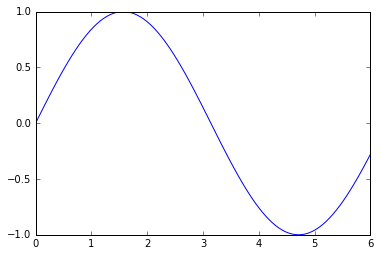

In [3]:
def F1(t):
    return 0

mass_spring_damper(1,0,1,F1,[0,1],np.linspace(0,6,100)) # Solution is y = sin(t)

In [4]:
mass_spring_damper(1,-1,1,F1,[0,1],np.linspace(0,2*np.pi,100))

Error: Negative coefficients


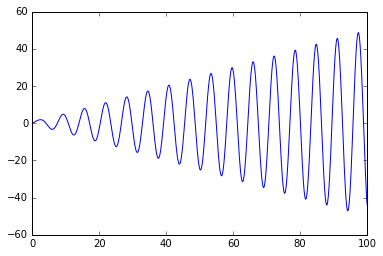

In [5]:
mass_spring_damper(1,0,1,np.sin,[0,1],np.linspace(0,100,1000)) # Resonance

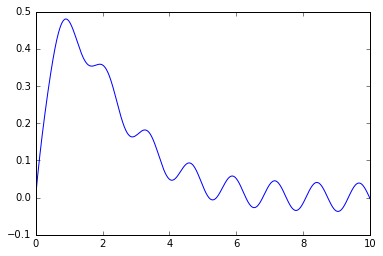

In [6]:
def F2(t):
     return np.sin(5*t)

mass_spring_damper(1,2,1,F2,[0,1], np.linspace(0,10,1000))

**QUESTION 2**

In [7]:
def linear_system(A,x0,t):
    "Plot solutions x1(t) and x2(t) of the linear system x' = Ax where x=[x1,x2]."
    def f(x,t):
        return [ A[0,0]*x[0] + A[0,1]*x[1] , A[1,0]*x[0] + A[1,1]*x[1] ]
    x = spi.odeint(f,x0,t)
    plt.plot(t,x[:,0],label='$x_1(t)$')
    plt.plot(t,x[:,1],label='$x_2(t)$')
    plt.legend()
    plt.show()

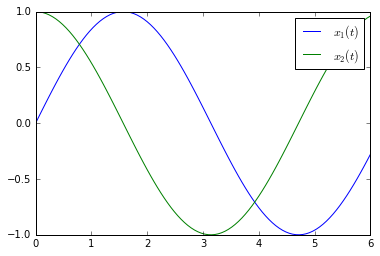

In [8]:
linear_system(np.array([[0,1],[-1,0]]),[0,1],np.linspace(0,6,100))

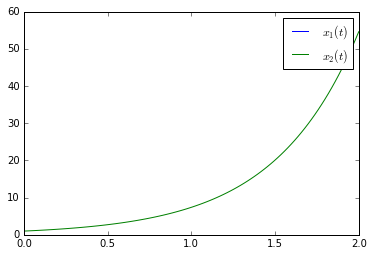

In [9]:
linear_system(np.random.randint(-4,5,(2,2)),[0,1],np.linspace(0,2,100))

**QUESTION 3**

In [10]:
def improved_euler(f,y0,t):
    "Solve and plot the solution of y'=f(y,t) by the improved Euler method."
    n = len(t)
    y = np.zeros(n)
    y[0] = y0
    
    for i in range(0,n-1):
        k = y[i] + f(y[i],t[i]) * (t[i+1] - t[i])
        y[i+1] = y[i] + (f(y[i],t[i]) + f(k,t[i+1])) * (t[i+1] - t[i]) / 2
    
    plt.plot(t,y)

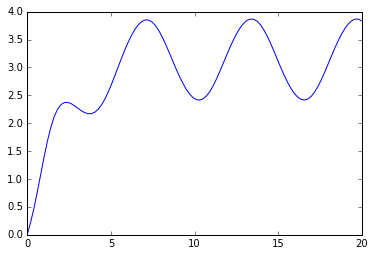

In [11]:
def f(x,t):
    return np.sin(x) + np.cos(t)

improved_euler(f, 0, np.linspace(0,20,100))

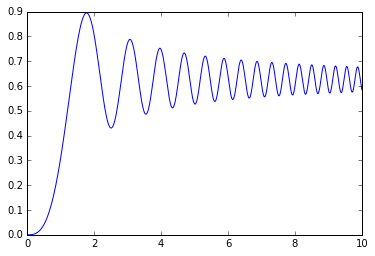

In [12]:
def f(x,t):
    return np.sin(t**2)

improved_euler(f, 0, np.linspace(0,10,1000))